In [3]:
#Cargamos librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score

In [32]:
#Carga desde un archivo .xlsx sin indice
credicel = pd.read_excel('Copia de df_limpio.xlsx')

In [33]:
#Identificar valores nulos por columna
valores_nulos=credicel.isnull().sum()
valores_nulos

folio                     0
tag                       0
folio_solicitud           0
fecha                     0
marca                     0
modelo                    0
plazo                     0
precio                    0
enganche                  0
descuento                 0
semana                    0
monto_financiado          0
costo_total               0
monto_accesorios          0
agente_venta              0
dis_venta                 0
status                    0
fraude                    0
empresa                  13
inversion                 0
pagos_realizados          0
reautorizacion            0
fecha_ultimo_pago      3356
fecha_pago_proximo     3356
status_cuenta          3314
puntos                    0
riesgo                    0
score_buro                0
razones_buro           7340
porc_eng                  0
limite_credito            0
semana_actual             0
cp_cliente             7243
edad_cliente          13108
cd_cliente                0
edo_cliente         

In [27]:
credicel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          22735 non-null  int64  
 1   precio              22735 non-null  float64
 2   enganche            22735 non-null  float64
 3   descuento           22735 non-null  float64
 4   semana              22735 non-null  float64
 5   monto_financiado    22735 non-null  float64
 6   costo_total         22735 non-null  float64
 7   monto_accesorios    22735 non-null  float64
 8   status              22735 non-null  float64
 9   fraude              22735 non-null  int64  
 10  inversion           22735 non-null  int64  
 11  pagos_realizados    22735 non-null  float64
 12  reautorizacion      22735 non-null  int64  
 13  puntos              22735 non-null  float64
 14  porc_enganche       22735 non-null  float64
 15  porc_tasa           22735 non-null  float64
 16  scor

In [36]:
#Cuarto método de sustitución de valores nulos
#Sustituir valores nulos por un string en  concreto
credicel["empresa"] =credicel["empresa"].fillna("Sin Especificar")
credicel["fecha_ultimo_pago"] =credicel["fecha_ultimo_pago"].fillna("2030-06-19 00:00:00")
credicel["fecha_pago_proximo"] = credicel["fecha_pago_proximo"].fillna("2030-06-19 00:00:00")
credicel["status_cuenta"] = credicel["status_cuenta"].fillna("Sin Especificar")
credicel["razones_buro"] = credicel["razones_buro"].fillna("N/A")

credicel["cp_cliente"] =credicel["cp_cliente"].fillna(method="bfill")

credicel["edad_cliente"]=credicel["edad_cliente"].fillna(round(credicel["edad_cliente"].mean(),1))

In [37]:
valores_nulos=credicel.isnull().sum()
valores_nulos

folio                 0
tag                   0
folio_solicitud       0
fecha                 0
marca                 0
modelo                0
plazo                 0
precio                0
enganche              0
descuento             0
semana                0
monto_financiado      0
costo_total           0
monto_accesorios      0
agente_venta          0
dis_venta             0
status                0
fraude                0
empresa               0
inversion             0
pagos_realizados      0
reautorizacion        0
fecha_ultimo_pago     0
fecha_pago_proximo    0
status_cuenta         0
puntos                0
riesgo                0
score_buro            0
razones_buro          0
porc_eng              0
limite_credito        0
semana_actual         0
cp_cliente            0
edad_cliente          0
cd_cliente            0
edo_cliente           0
cd_venta              0
edo_venta             0
curp                  0
dtype: int64

In [38]:
#Graficamos todas las dispersiones entre todas las variables
sns.pairplot(credicel)

Output hidden; open in https://colab.research.google.com to view.

In [40]:

#Declaramos las variables dependientes e independientes para la regresión No lineal
var_x= credicel[['score_buro']]
var_y= credicel['limite_credito']

In [41]:
#Redefinimos las variables
x= var_x
y= var_y

# MODELO 1

y = ax^2 + bx + c   ("Función cuadrática")

In [89]:
def  func1 (x, a, b,c):
     return a*x**2 + b*x + c

In [90]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, credicel['score_buro'], credicel['limite_credito'])

In [91]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([ 2.60332851e-02, -1.66265524e+01,  6.45204025e+03])

In [93]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, credicel['score_buro'], credicel['limite_credito'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a * x ** 2 + b * x + c

In [94]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
#x= x.reshape(51, 1)
#y = y.reshape(51, 1)
#yfit1 = yfit1.reshape(51, 1)
yfit1

,score_buro
0,6452.040251
1,6452.040251
2,6452.040251
3,6452.040251
4,6452.040251
...,...
22730,4380.494616
22731,4666.002943
22732,4305.171253
22733,7549.969285


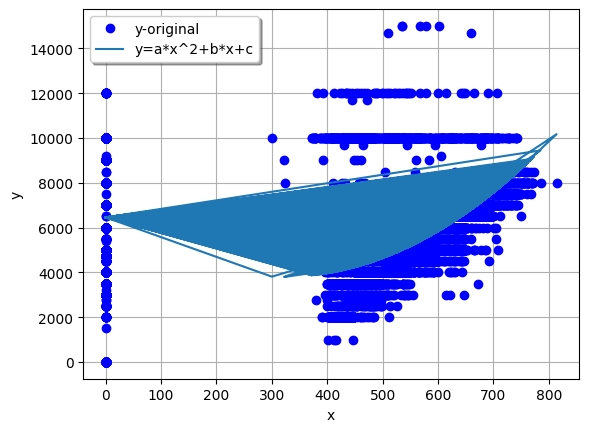

In [95]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [96]:
#Calculamos el coeficiente de determinación del modelo

R2 = r2_score(y, yfit1)
R2

0.19840911916601012

# MODELO 2

In [65]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
var_x2= credicel[['riesgo']]
var_y= credicel['limite_credito']

In [66]:
#Redefinimos las variables
x2= var_x2
y= var_y

In [67]:
def func2(x2, a, b, c):
    return a*np.exp(b*x2)+c

In [68]:
#Ajustamos los parámetros de la función curve_fit
parametros2, covs2= curve_fit(func2, credicel['riesgo'], credicel['limite_credito'])

In [69]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros2

array([-3.62269152e-15,  1.00000000e+00,  2.08625869e+17])

In [70]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros2, _ = curve_fit(func2, credicel['riesgo'], credicel['limite_credito'])
a2, b2, c2 = parametros2[ 0 ], parametros2[ 1 ], parametros2[ 2 ]
yfit2 = a2*np.exp(x2*b2)+c2

In [71]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
#yfit2 = yfit2.reshape(51, 1)
yfit2

,riesgo
0,2.086259e+17
1,2.086259e+17
2,2.086259e+17
3,2.086259e+17
4,2.086259e+17
...,...
22730,2.086259e+17
22731,2.086259e+17
22732,2.086259e+17
22733,2.086259e+17


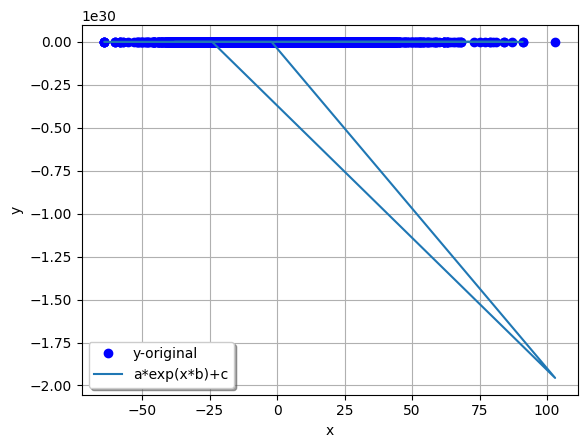

In [72]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x2, y2, 'bo', label="y-original")
plt.plot(x2, yfit2, label="a*exp(x*b)+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [74]:
#Calculamos el coeficiente de determinación del modelo
R2 = r2_score(y, yfit2)
R2

-3.684126288759777e+49